In [89]:
import os
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

DATA_PATH = os.path.join('asum', 'out')
FILENAME = 'STO2-T7-S2(2)-A0.1-B0.001,0.1,0.1-G1.0,1.0-I1000-ProbWords.csv'

In [90]:
# Parse filename
n_topics = int(FILENAME.split('-')[1][1:])
n_sentiment = int(FILENAME.split('-')[2][1:].split('(')[-1][:-1])

print(f"Number of topics: {str(n_topics)}")
print(f"Number of sentiment: {str(n_sentiment)}")

Number of topics: 7
Number of sentiment: 2


In [91]:
df = pd.read_csv(os.path.join(DATA_PATH, FILENAME))
df = df.iloc[:,:n_topics*n_sentiment]

pos_sentiment = df.iloc[:,:n_topics]
neg_sentiment = df.iloc[:,n_topics:]

df.head()

,S0-T0,S0-T1,S0-T2,S0-T3,S0-T4,S0-T5,S0-T6,S1-T0,S1-T1,S1-T2,S1-T3,S1-T4,S1-T5,S1-T6
0,call (0.016),peopl (0.022),sent (0.038),state (0.098),parti (0.019),cdm (0.048),obama (0.007),state (0.009),parti (0.012),travel (0.029),percent (0.066),parti (0.022),agricultur (0.029),pm (0.100)
1,work (0.011),state (0.019),blackberri (0.024),date (0.055),ireland (0.018),pleas (0.038),would (0.007),govern (0.006),tea (0.010),thx (0.026),approv (0.038),tori (0.022),develop (0.023),secretari (0.057)
2,get (0.011),chri (0.012),receiv (0.021),comm (0.054),uup (0.018),need (0.031),presid (0.006),would (0.006),beck (0.009),sid (0.025),disapprov (0.024),poll (0.021),global (0.020),offic (0.050)
3,want (0.010),attack (0.012),wireless (0.017),agreement (0.054),deal (0.016),state (0.031),said (0.006),said (0.005),mack (0.009),jm (0.024),rate (0.023),labour (0.020),food (0.017),depart (0.040)
4,know (0.009),famili (0.012),financi (0.015),benghazi (0.054),northern (0.016),polici (0.030),one (0.005),american (0.005),death (0.009),h (0.022),among (0.020),cent (0.017),world (0.017),room (0.036)


In [92]:
TOP_K = 20


def parse_topic(column, scale_factor=10**3):
    parse = lambda row : (re.search(r'^([\w\s]+)\s\(', row).group(1),
                          float(re.search(r'\d+.\d+', row).group(0)))
    parsed = map(parse, column)
    words, weights = zip(*list(parsed))
    '''
    weights_sum = sum(weights)
    weights = [max(i/weights_sum * scale_factor, 1) for i in weights]
    '''
    return list(zip(words, weights))

def extract_info(df_sentiment):
    out_dict = dict()
    for topic in df_sentiment:
        out_dict[topic] = parse_topic(df_sentiment[topic])
    return out_dict

parsed_positive = extract_info(pos_sentiment)
parsed_negative = extract_info(neg_sentiment)

In [93]:

def generate_wordcloud(sentiment_dict : dict, max_words=30):
    for topic, words in sentiment_dict.items():
        wordcloud = WordCloud(max_words=max_words).generate_from_frequencies(dict(words))
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(topic)
        plt.show()

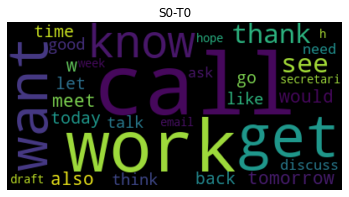

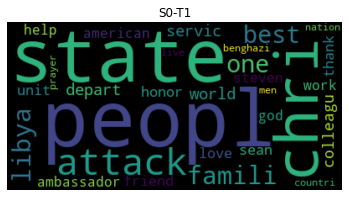

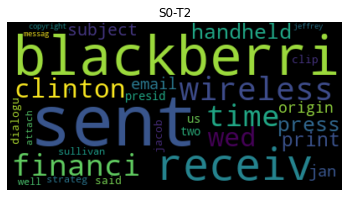

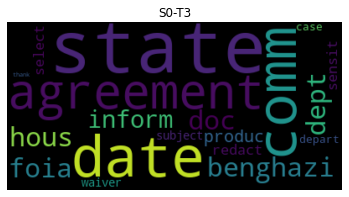

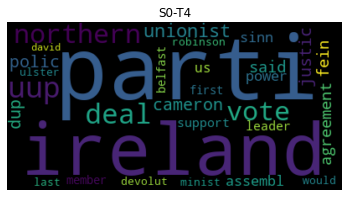

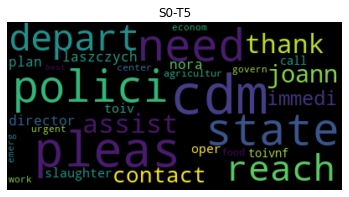

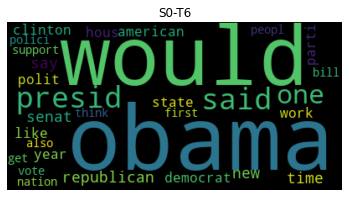

In [94]:
# Positive sentiment
generate_wordcloud(parsed_positive)

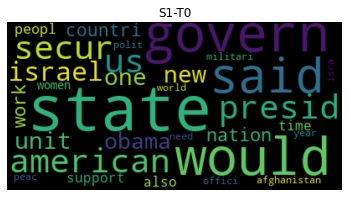

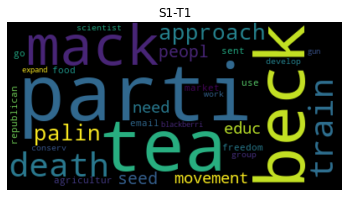

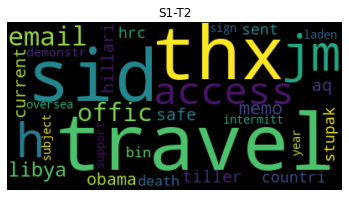

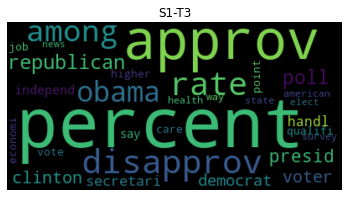

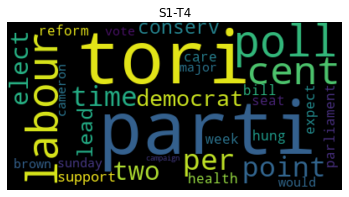

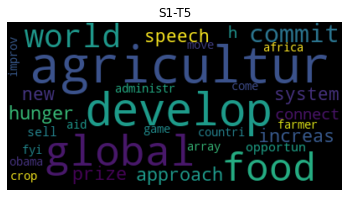

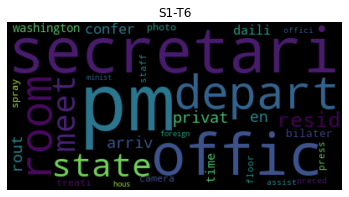

In [95]:
# Negative sentiment
generate_wordcloud(parsed_negative)